# Pymaceuticals Inc.
---
In this notebook, we will analyze the effect of the Capomulin drug treatment on mouse tumor volume and weight. In addition, we will compare the effectiveness of Capomulin against other anti-tumor medications.

In [1]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

#Write paths for the study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

#Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

#Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
#Check the number of mice.
merged_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint. If there are any duplicates, we need to identify \
# and delete them.

#As such, write code to get duplicate mice by ID number that shows up for Mouse ID and Timepoint if one exists.
duplicates = merged_df[merged_df[['Mouse ID', 'Timepoint']].duplicated() == True]
duplicates['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
#Get all the data for this duplicate mouse ID. 
merged_df[merged_df[['Mouse ID', 'Timepoint']].duplicated() == True]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_df.drop(merged_df[merged_df['Mouse ID'] == 'g989'].index, inplace = True)
merged_df.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
#Check to make sure it was deleted properly (the array should be empty)
duplicates = merged_df[merged_df[['Mouse ID', 'Timepoint']].duplicated() == True]
duplicates['Mouse ID'].unique()

array([], dtype=object)

In [7]:
#Checking the number of mice in the clean DataFrame.
merged_df["Mouse ID"].nunique()

248

## Summary Statistics

We need to get the summary statistics of our data before any exploratory analyses.

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of \
# the tumor volume for each regimen

#Assemble the resulting series into a single summary DataFrame.
#Adding # of Observed Mouse Timepoints since graphs later in this code will use these data
stat_df = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(["mean", "median", "var", "std", "sem", "count"])
stat_df['# of Observed Mouse Timepoints'] = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].count()
stat_df

,mean,median,var,std,sem,count,# of Observed Mouse Timepoints
Drug Regimen,,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181,181
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,148,148
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181,181


## Bar and Pie Charts

After the summary statistics have been made, we can now perform exploratory analyses and make graphs of our data. To demonstrate the flexibility of python, we will use both pyplot and pandas to graph our data.

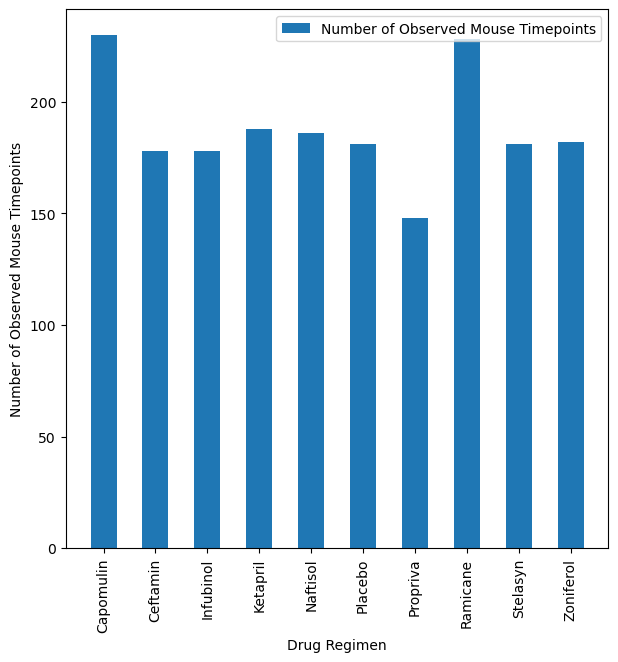

In [12]:
#Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#Bar Chart Creation
plt.bar(stat_df.index, stat_df["# of Observed Mouse Timepoints"], width=0.5)
plt.xticks(rotation="vertical")

#Change the size and add labels
plt.rcParams["figure.figsize"] = [7, 7]
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.legend(["Number of Observed Mouse Timepoints"])
plt.show()

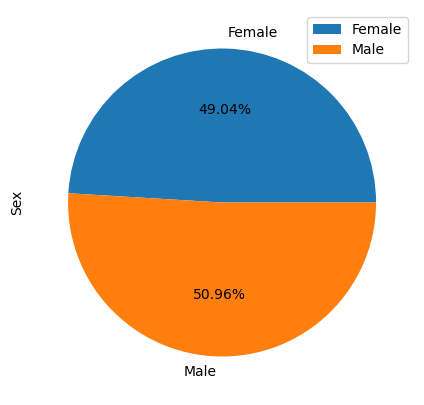

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#Creating a new dataframe to plot the data
sex_df = pd.DataFrame()
sex_df["Sex"] = merged_df.groupby('Sex')['Sex'].count()
sex_df.plot.pie(y="Sex", figsize=(5, 5), autopct="%1.2f%%")
plt.show()

## Quartiles, Outliers and Boxplots

We analyzed the drugs Capomulin, Ramicane, Infubinol, and Ceftamin with the following code to see which was more effective in stopping tumor growth. We used boxplots since we wanted to see the distribution of the data and identify any outliers.

In [15]:
#Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#Capomulin, Ramicane, Infubinol, and Ceftamin

#Start by getting the last (greatest) timepoint for each mouse (not every mouse survived to reach the last time point)
#Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_time_df = merged_df.groupby("Mouse ID")["Timepoint"].max().reset_index().merge(merged_df, on=['Mouse ID','Timepoint'])
max_time_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [16]:
# We calculated the quartiles and created a boxplot of the tumor sizes of the drugs Capomulin, \
# Ramicane, Infubinol, and Ceftamin to analyze the difference between these treatment regimens.

#Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

for drug in drugs:
    
    #Locate the rows which contain mice on each drug and get the tumor volumes
    tumor = max_time_df[max_time_df['Drug Regimen']==drug]['Tumor Volume (mm3)']
   
    #Calculate the IQR and quantitatively determine if there are any potential outliers. 
    iqr = tumor.quantile(.75)-tumor.quantile(.25)
    upper = tumor.quantile(.75) + 1.5*iqr
    lower = tumor.quantile(.25) - 1.5*iqr
    
    #add each tumor volume at the maximum time point to the tumor_list 
    tumor_list.append(tumor)
    
    #Determine outliers using upper and lower bounds
    print(f"{drug}'s potential outliers: {tumor[(tumor>=upper)|(tumor<=lower)]}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


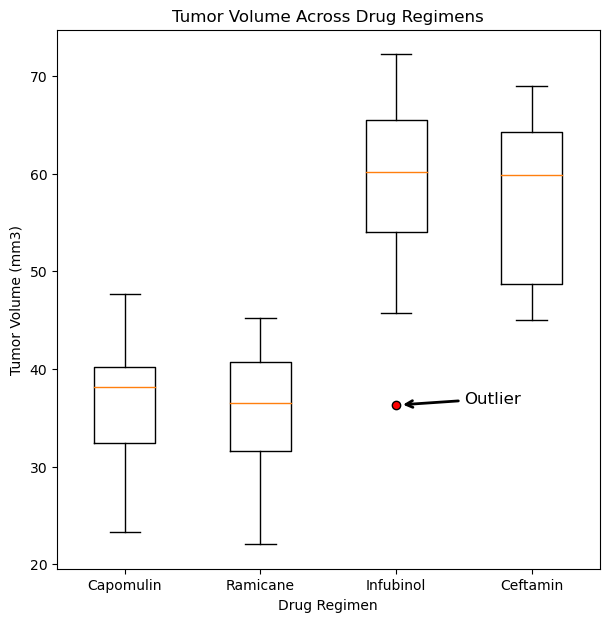

In [18]:
#Generate a box plot that shows the distrubution of the tumor volume for each treatment group and any outliers
plt.boxplot(tumor_list, labels=drugs, flierprops=dict(marker='o', markerfacecolor='red'));
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Across Drug Regimens")

#The red data point in the boxplot notates an outlier
plt.annotate('Outlier', xy=(3.03, 36.321346), xytext=(3.5, 36.5),
             arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=2), fontsize=12)

plt.show()

## Line and Scatter Plots

We created line graphs and scatter plots to determine if an association exists between Capomulin—our drug of interest—and tumor volume.

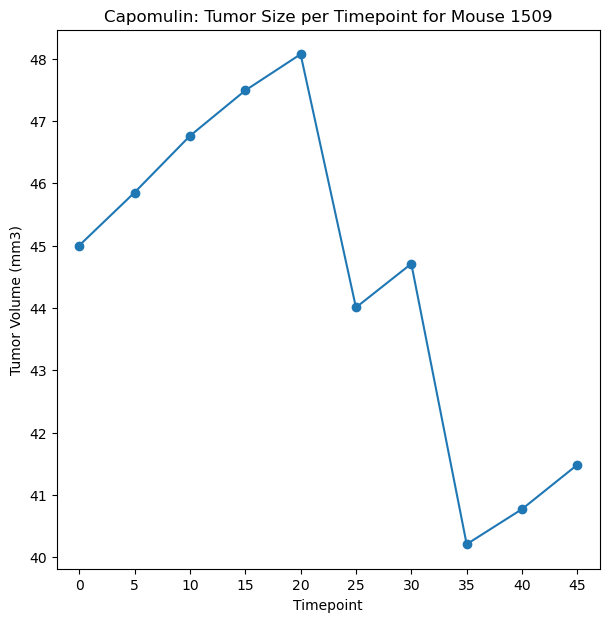

In [20]:
#First, we can visualize the tumor progression across each timepoint for individual mice.

#Using the following code, we will generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]
mouse_data = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509"]

plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], label='Line Plot', marker='o')

plt.xlim(-2, 47)
plt.xticks(range(0, 50, 5))

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin: Tumor Size per Timepoint for Mouse 1509")

plt.show()

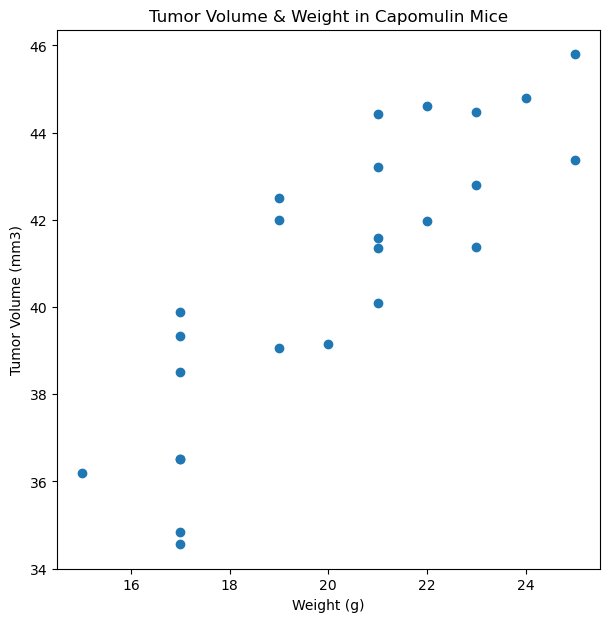

In [21]:
# Next, to determine if an association exists between mouse weight and tumor volume, we will generate a scatter \
# plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]
capomulin_avg = capomulin_df.groupby(["Mouse ID"])[["Weight (g)", "Tumor Volume (mm3)"]].mean()

plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"], label='Line Plot', marker='o')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume & Weight in Capomulin Mice")
plt.show()

## Correlation and Regression

We will now calculate a linear regression to determine if there is a significant relationsip between weight and tumor volume for mice treated with Capomulin.

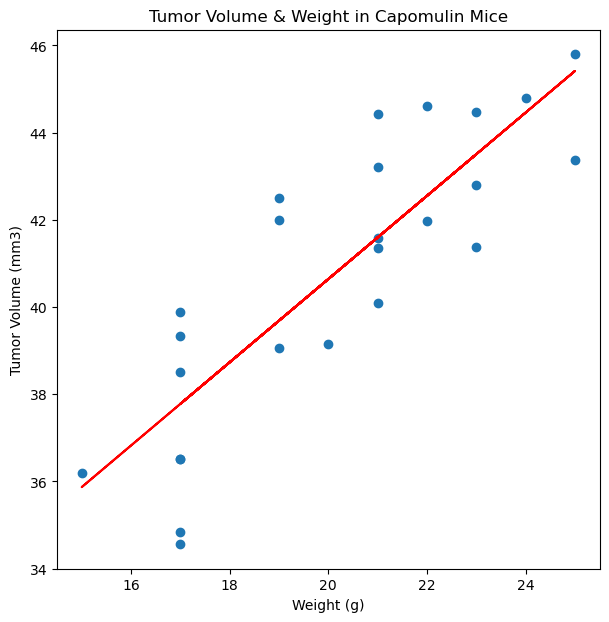

In [22]:
#Linear regression plot:
plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"], label='Line Plot', marker='o')
regression = st.linregress(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
y_values = capomulin_avg["Weight (g)"]*regression[0]+regression[1]

plt.plot(capomulin_avg["Weight (g)"], y_values, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume & Weight in Capomulin Mice")
plt.show()

In [23]:
# Printing the regression slope formula, significance value (p-value), standard error, and \
# the correlation coefficient (rvalue)
print(regression)

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)
